# **FINAL PROJECT - PPE Object Detection for Manufacture**

___
Kelompok: 3 

Anggota: 

- Putra Fisabil Muhammad
- Gregorius Yoseph Radityo
- Rifqi Munif Imanullah
- Rafi Arya Siregar


Batch: HCK-028

Objektif:
___

# **I. LATAR BELAKANG STUDI KASUS**
___
PT Mayora Indah Tbk, sebagai salah satu perusahaan FMCG terkemuka di Indonesia, terus berkomitmen menjaga kualitas dan keamanan produknya melalui penerapan standar Good Manufacturing Practice (GMP) dan ISO 9001. Namun, perusahaan menghadapi tantangan dalam memastikan ribuan karyawan di area produksi selalu menggunakan alat pelindung diri (APD) seperti celemek, sarung tangan, jaring rambut, dan masker sesuai standar yang berlaku.

Selama ini, pengawasan kepatuhan dilakukan secara manual oleh tim Quality Assurance (QA), namun metode tersebut terbukti kurang efektif dan seringkali melewatkan pelanggaran kecil yang berpotensi besar terhadap risiko kontaminasi produk.

Untuk mengatasi masalah ini, PT Mayora mengembangkan sistem berbasis Artificial Intelligence bernama PPEye. Sistem ini menggunakan teknologi object detection yang dilatih secara khusus untuk mendeteksi keberadaan dan kelengkapan APD karyawan di area produksi secara real-time melalui kamera CCTV yang terpasang di setiap lini. PPEye dikembangkan dengan model berbasis YOLOv8 yang telah dioptimalkan dengan data dari lingkungan pabrik Mayora sendiri.

Penerapan PPEye membawa dampak signifikan dengan meningkatkan tingkat kepatuhan APD sebesar 90% dalam enam bulan, menurunkan risiko non-conformance dalam audit GMP dan ISO, serta meningkatkan efisiensi pengawasan tanpa menambah beban kerja tim QA. PPEye kini menjadi langkah strategis Mayora dalam menjaga reputasi keamanan dan kualitas produknya di pasar global.

## **A. SMART FRAMEWORK**
___
**PROBLEM STATEMENT:** 
Mayora membutuhkan sistem AI untuk mendeteksi kepatuhan APD secara otomatis, guna meningkatkan keamanan produk dan mendukung standar GMP & ISO 9001 dengan hasil terukur dalam 14 hari.

* **Specific**: Mendeteksi otomatis kelengkapan APD karyawan.
* **Measurable**: Mengukur tingkat kepatuhan karyawan sebelum dan sesudah penerapan PPEye
* **Achievable**: Menggunakan teknologi object detection berbasis AI seperti YOLOv8.
* **Relevant**: Mendukung kepatuhan standar GMP & ISO 9001 serta menjaga keamanan produk.
* **Time Bound**: Diselesaikan dalam waktu 14 hari pengembangan awal.

## **B. JUSTIFIKASI PERMASALAHAN**
___
**[ISO 9001 dan Good Manufacturing Practices (GMP)](https://trustmandiri.com/perbedaan-iso-9001-dan-gmp-standar-penting-dalam-industri-manufaktur/)**

Artikel ini membahas perbedaan mendasar antara ISO 9001 dan Good Manufacturing Practices (GMP), dua standar penting dalam industri manufaktur. ISO 9001 adalah standar sistem manajemen mutu yang berlaku secara umum di berbagai sektor untuk memastikan konsistensi kualitas produk dan layanan, dengan fokus pada efisiensi proses, kepuasan pelanggan, serta peningkatan berkelanjutan seluruh organisasi. Sebaliknya, GMP adalah pedoman yang sangat spesifik dan bersifat regulatif, dikhususkan untuk industri seperti farmasi, makanan, dan kosmetik, dengan penekanan pada keamanan, kebersihan, kontrol operasional, pelatihan staf, serta dokumentasi detil guna menjamin produk yang aman dan bebas kontaminasi. ISO 9001 bersifat universal dan lebih strategis dalam tata kelola mutu, sedangkan GMP menekankan teknis operasional dan kepatuhan hukum di industri dengan risiko tinggi, sehingga keduanya dapat saling melengkapi demi tercapainya kualitas dan keamanan produk yang optimal.

# **II. IMPORT LIBRARIES**
___
Mengimpor beberapa pustaka yang digunakan untuk analisis data gambar, pengolahan data gambar, proses pemodelan, dan evaluasi model.

In [7]:
# Pengolahan Data
import os
import random
import numpy as np
import pandas as pd
from collections import Counter, defaultdict

# Visualisasi Data
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

# Pengolahan Gambar
import cv2

# **III. LOADING DATA**
___
Loading data training dan data validation yang akan digunakan untuk projek ini.

In [3]:
# Direktori label total
labels = {
    "Total": "dataset/labels",
}

# Direktori gambar total
images = {
    "Total": "dataset/images",
}

# Direktori data total
splits = {
    'Total': 'dataset',
}

# Kelas dari tiap gambar
class_names = ['Apron', 'Glove', 'Hairnet', 'Mask', 'No_Apron', 'No_Glove', 'No_Hairnet', 'No_Mask']

# Format gambar
img_ext = ('.jpg', '.jpeg', '.png')

# Jumlah gambar yang ditampilkan
samples_per_class = 5

# **IV. EXPLORATORY DATA ANALYSIS**
___
Menganalisis karakteristik data untuk kemudian diimplementasikan pada proses modeling.

## **A. Distribusi Data Setiap Kelas**

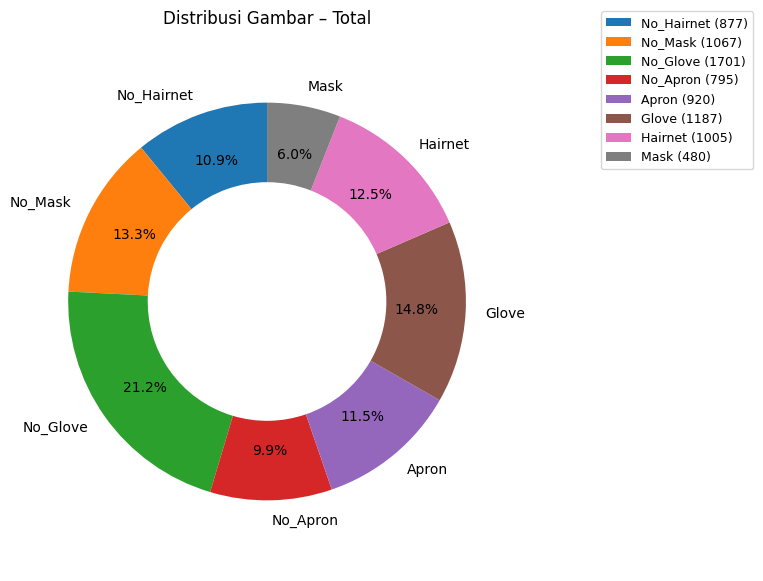

In [4]:
# ----- Data dan warna -----
colors = plt.get_cmap('tab10').colors[:len(class_names)]

results = {}
total_counter = Counter()

# Hanya ambil data Total dari labels
for name, path in labels.items():
    counter = Counter()
    for fname in os.listdir(path):
        if not fname.endswith(".txt"):
            continue
        with open(os.path.join(path, fname), 'r', encoding='utf-8', errors='ignore') as f:
            for line in f:
                if line.strip():
                    class_id = int(line.strip().split()[0])
                    counter[class_id] += 1
                    total_counter[class_id] += 1
    results[name] = counter

# Tambahkan data Total ke hasil
results["Total"] = total_counter

# ----- Plot hanya Total -----
counter = results["Total"]
labels = [class_names[i] for i in counter.keys()]
values = list(counter.values())
legend_labels = [f"{l} ({v})" for l, v in zip(labels, values)]

fig, ax = plt.subplots(figsize=(7, 7))

wedges, _, _ = ax.pie(
    values,
    startangle=90,
    colors=colors,
    labels=labels,
    autopct='%1.1f%%',
    pctdistance=0.75,
    wedgeprops=dict(width=0.4)
)

ax.set_title("Distribusi Gambar – Total")
ax.axis('equal')         # pie tetap bulat

# Beri ruang di sisi kanan untuk legend
plt.subplots_adjust(right=0.75)

# Legend betul‑betul di pojok kanan‑atas luar chart
ax.legend(
    wedges,
    legend_labels,
    loc="upper left",      # titik referensi legend box
    bbox_to_anchor=(1.25, 1.05),  # (x>1 → ke kanan, y>1 → sedikit ke atas)
    fontsize=9
)

plt.show()


| **Class**   | **Train Data** | **Validation Data** | **Total** |
| ----------- | -------------- | ------------------- | --------- |
| No\_Glove  | 1,363          | 338                 | 1,701     |
| No\_Apron   | 649            | 146                 | 795       |
| No\_Mask    | 848            | 219                 | 1,067     |
| No\_Hairnet | 703            | 174                 | 877       |
| Glove       | 947            | 240                 | 1,187     |
| Hairnet     | 800            | 205                 | 1,005     |
| Apron       | 726            | 194                 | 920       |
| Mask        | 388            | 92                  | 480       |
| **Total**   | **6,424**      | **1,608**           | **8,032** |

Berdasarkan hasil distribusi pada dataset, terdapat beberapa insight yang diperoleh:

1. Jumlah total bounding box pada dataset adalah 8.032 gambar, yang tersebar di berbagai kelas alat pelindung diri (APD).
2. No_Glove merupakan kelas terbanyak dengan 1.701 data (21.2% dari total dataset), diikuti oleh Glove dengan 1.187 data (14.8%). Selain itu, kelas No_Mask (1.067 data / 13.3%) dan Hairnet (1.005 data / 12.5%) juga memberikan kontribusi signifikan terhadap distribusi data. Di sisi lain, Mask adalah kelas dengan jumlah data terkecil, hanya 480 data (6.0%).
3. Dataset ini memiliki distribusi data yang proporsional, dengan keseimbangan antar kelas yang cukup baik. Meskipun ada kelas dengan jumlah data yang lebih sedikit (seperti Mask), distribusi kelas secara keseluruhan tetap memberikan gambaran yang cukup baik untuk deteksi objek.

**Kesimpulan:**

Dataset yang terkumpul merupakan data yang diambil dari beberapa sumber internet dan hasil gambar yang kami produksi. Secara keseluruhan, dataset yang kami peroleh memiliki proporsi kelas seimbang yang telah mencakup objek-objek penting dalam pendeteksian alat pelindung diri (APD).

## **B. Deteksi Gambar Rusak dan Gambar Tanpa Anotasi**

In [8]:
# Fungsi untuk memeriksa apakah gambar dapat dibaca
def check_image_quality(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return False
        return True
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")
        return False

# Fungsi untuk memeriksa kualitas data dan missing annotations
def check_data_and_annotations():
    damaged_files = []
    missing_annotations = []
    
    # Mengakses direktori label dan gambar sesuai dengan path yang benar
    label_dir = labels["Total"]
    image_dir = images["Total"]
    
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            # Menggunakan ekstensi gambar yang tepat
            img_file = label_file.replace('.txt', '.jpg')  # Cek ekstensi gambar .jpg
            img_path = os.path.join(image_dir, img_file)
            
            # Jika gambar .jpg tidak ditemukan, coba ekstensi lain
            if not os.path.exists(img_path):
                img_file = label_file.replace('.txt', '.png')  # Cek ekstensi .png
                img_path = os.path.join(image_dir, img_file)
            
            # Periksa apakah gambar ada dan dapat dibaca
            if not os.path.exists(img_path):
                print(f"Gambar tidak ditemukan: {img_file}")
                missing_annotations.append(img_file)
            elif not check_image_quality(img_path):
                damaged_files.append(img_file)

    return damaged_files, missing_annotations

# Cek hasil kualitas data dan missing annotations
damaged_files, missing_annotations = check_data_and_annotations()

# Menampilkan hasil
if len(damaged_files) > 0:
    print(f"Damaged Files: {damaged_files}")
else:
    print("Tidak ada gambar yang rusak.")

if len(missing_annotations) > 0:
    print(f"Missing Annotations: {missing_annotations}")
    
    # Menampilkan gambar yang memiliki missing annotations
    fig, axes = plt.subplots(1, len(missing_annotations), figsize=(15, 5))
    if len(missing_annotations) == 1:  # Jika hanya satu gambar, tidak ada array axes
        axes = [axes]

    for ax, img_name in zip(axes, missing_annotations):
        img_path = os.path.join(images["Total"], img_name)
        
        # Periksa apakah gambar ada sebelum mencoba untuk membacanya
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert dari BGR ke RGB untuk ditampilkan
            ax.imshow(img)
            ax.axis('off')  # Menyembunyikan axis
            ax.set_title(img_name)  # Menampilkan nama gambar di atas gambar
        else:
            ax.text(0.5, 0.5, f'Gambar tidak ditemukan: {img_name}', ha='center', va='center', fontsize=12)
            ax.axis('off')  # Menyembunyikan axis

    plt.show()
else:
    print("Tidak ada gambar dengan missing annotations.")


Tidak ada gambar yang rusak.
Tidak ada gambar dengan missing annotations.


## **C. Ukuran Gambar**

Rata-rata Ukuran Gambar per Kelas:


,Class,Mean Height,Mean Width,Sample Count
0,Apron,825.525000,810.560000,800
1,Glove,599.886364,851.772727,704
2,Hairnet,408.865979,638.680412,485
3,Mask,590.315789,1032.336842,380
4,No_Apron,586.341463,569.455910,533
5,No_Gloves,818.623864,592.351136,880
6,No_Hairnet,899.550974,753.741123,873
7,No_Mask,759.290685,585.948373,891


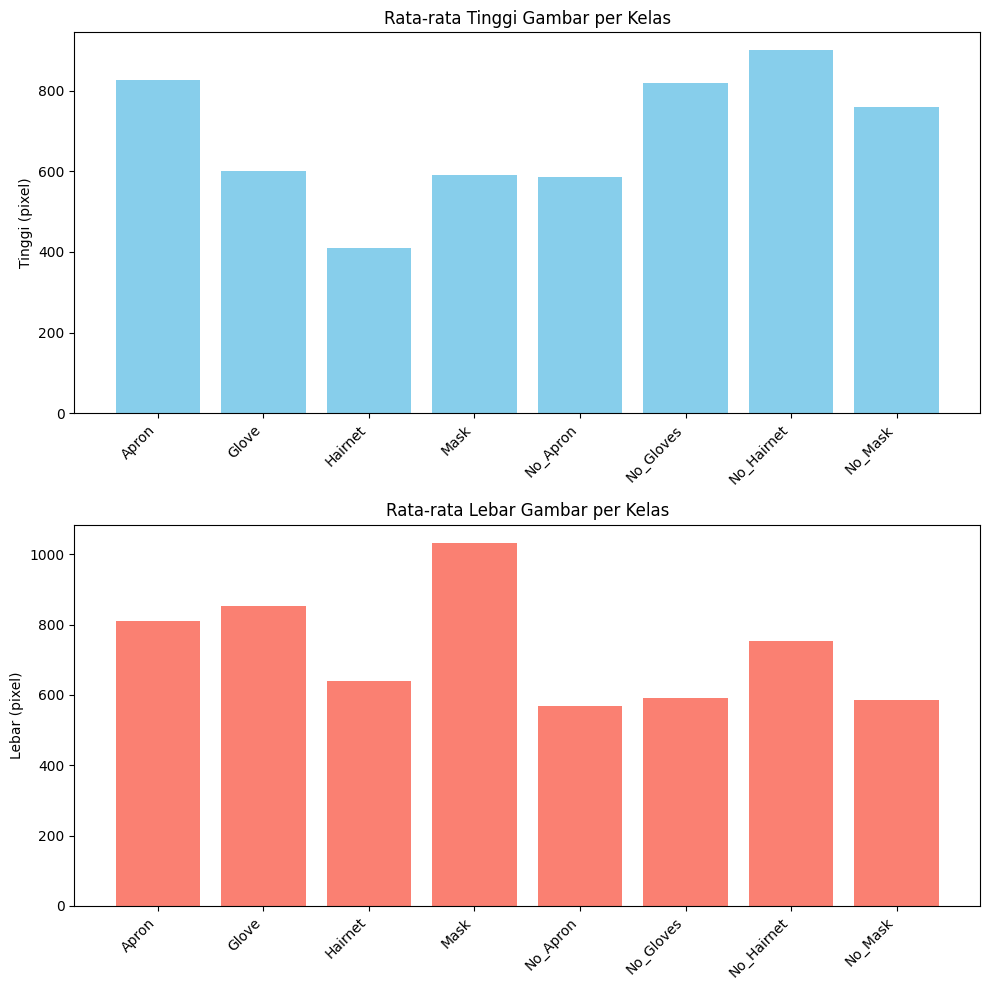

In [ ]:
def calculate_mean_shape_per_class(labels_dir, images_dir, class_names, img_ext):
    class_stats = {name: {'heights': [], 'widths': []} for name in class_names}
    
    # Iterasi melalui semua file label
    for label_file in glob(os.path.join(labels_dir, '**/*.txt'), recursive=True):
        # Cari file gambar yang sesuai
        image_file = None
        for ext in img_ext:
            temp_file = label_file.replace('.txt', ext).replace('labels', 'images')
            if os.path.exists(temp_file):
                image_file = temp_file
                break
        
        if not image_file:
            continue
        
        # Baca ukuran gambar
        try:
            with Image.open(image_file) as img:
                width, height = img.size
        except:
            continue
        
        # Baca file label untuk mengetahui kelas apa saja yang ada
        with open(label_file, 'r') as f:
            class_ids_in_image = set()
            for line in f:
                class_id = int(float(line.split()[0]))
                class_ids_in_image.add(class_id)
        
        # Tambahkan ukuran gambar ke statistik setiap kelas yang ada
        for class_id in class_ids_in_image:
            if class_id < len(class_names):
                class_name = class_names[class_id]
                class_stats[class_name]['heights'].append(height)
                class_stats[class_name]['widths'].append(width)
    
    # Hitung rata-rata untuk setiap kelas
    results = []
    for class_name in class_names:
        if class_stats[class_name]['heights']:
            mean_height = np.mean(class_stats[class_name]['heights'])
            mean_width = np.mean(class_stats[class_name]['widths'])
            count = len(class_stats[class_name]['heights'])
        else:
            mean_height = mean_width = count = 0
        results.append({
            'Class': class_name,
            'Mean Height': mean_height,
            'Mean Width': mean_width,
            'Sample Count': count
        })
    
    return pd.DataFrame(results)

# Hitung statistik
shape_stats = calculate_mean_shape_per_class(labels["Total"], images["Total"], class_names, img_ext)

# Tampilkan tabel
print("Rata-rata Ukuran Gambar per Kelas:")
display(shape_stats)

# Plot histogram dalam layout vertikal
plt.figure(figsize=(10, 10))  # Ukuran figure disesuaikan untuk layout vertikal

# Plot pertama (tinggi)
plt.subplot(2, 1, 1)  # 2 baris, 1 kolom, plot pertama
plt.bar(shape_stats['Class'], shape_stats['Mean Height'], color='skyblue')
plt.title('Rata-rata Tinggi Gambar per Kelas')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Tinggi (pixel)')

# Plot kedua (lebar)
plt.subplot(2, 1, 2)  # 2 baris, 1 kolom, plot kedua
plt.bar(shape_stats['Class'], shape_stats['Mean Width'], color='salmon')
plt.title('Rata-rata Lebar Gambar per Kelas')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Lebar (pixel)')

plt.tight_layout()
plt.show()

Berikut hasil insight yang dapat diperoleh berdasarkan resolusi gambar pada dataset:

1. Terdapat variasi ukuran yang signifikan antar kelas. Tinggi gambar bervariasi dari 480 picel hingga 899 pixel. Untuk lebar gambar berkisar antara 596 pixel hingga 1.032 pixel.
2. Kelas dengan ukuran resolusi gambar terkecil adalah **Hairnet** dengan ukuran sebesar 408 pixel, sementara yang yang paling tinggi adalah kelas **No_Harinet** dengan ukuran tertinggi dengan 899 pixel. Kelas dengan ukuran resolusi terlebar adalah kelas **Mask** dengan ukuran 1.032 pixel, yang bisa disebabkan karena area wajah yang luas.
3. Terdapat ketidakseimbangan dataset antar kelas seperti No_Mask dan Mask yang berbeda hampir 500 data. 

## **D. Sampling Data**

In [ ]:
# Konfigurasi
labels = {"Total": "dataset/labels"}
images = {"Total": "dataset/images"}
class_names = ['Apron', 'Glove', 'Hairnet', 'Mask', 'No_Apron', 'No_Glove', 'No_Hairnet', 'No_Mask']
img_ext = ('.jpg', '.jpeg', '.png')
samples_per_class = 5
output_dir = "heatmap_results"
os.makedirs(output_dir, exist_ok=True)

# Fungsi untuk membuat Gaussian kernel
def create_gaussian_kernel(width, height, sigma_scale=6):
    """Membuat kernel Gaussian 2D dengan ukuran yang ditentukan"""
    kernel = np.zeros((height, width))
    center_x, center_y = width // 2, height // 2
    
    # Hitung sigma berdasarkan ukuran bounding box
    sigma_x = max(width / sigma_scale, 1.0)
    sigma_y = max(height / sigma_scale, 1.0)
    
    # Generate grid
    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    x, y = np.meshgrid(x, y)
    
    # Gaussian function
    kernel = np.exp(-((x - center_x)**2 / (2 * sigma_x**2) + 
                      (y - center_y)**2 / (2 * sigma_y**2)))
    return kernel

# Fungsi untuk memproses gambar dan label
def process_image(image_path, label_path, class_idx):
    """Membuat heatmap untuk kelas tertentu pada sebuah gambar"""
    # Baca gambar dan inisialisasi heatmap
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape
    heatmap = np.zeros((height, width), dtype=np.float32)
    
    # Baca file label
    if not os.path.exists(label_path):
        return img, heatmap
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    # Proses setiap bounding box
    for line in lines:
        data = line.strip().split()
        if not data:
            continue
            
        cls_id = int(data[0])
        if cls_id != class_idx:
            continue
            
        # Konversi koordinat YOLO ke pixel
        x_center = float(data[1]) * width
        y_center = float(data[2]) * height
        w = float(data[3]) * width
        h = float(data[4]) * height
        
        # Hitung koordinat bounding box
        x_min = int(max(0, x_center - w/2))
        y_min = int(max(0, y_center - h/2))
        x_max = int(min(width, x_center + w/2))
        y_max = int(min(height, y_center + h/2))
        
        # Lewati jika bounding box tidak valid
        if x_max <= x_min or y_max <= y_min:
            continue
            
        # Buat kernel Gaussian
        kernel_width = x_max - x_min
        kernel_height = y_max - y_min
        
        if kernel_width > 0 and kernel_height > 0:
            kernel = create_gaussian_kernel(kernel_width, kernel_height)
            
            # Tambahkan kernel ke heatmap
            heatmap[y_min:y_max, x_min:x_max] += kernel
    
    # Normalisasi heatmap
    if heatmap.max() > 0:
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
    
    return img, heatmap

# Main processing
for class_idx, class_name in enumerate(tqdm(class_names, desc="Processing classes")):
    class_output_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_output_dir, exist_ok=True)
    
    # Kumpulkan semua gambar yang mengandung kelas ini
    valid_images = []
    for label_file in os.listdir(labels["Total"]):
        if not label_file.endswith('.txt'):
            continue
            
        label_path = os.path.join(labels["Total"], label_file)
        base_name = os.path.splitext(label_file)[0]
        
        # Cari file gambar yang sesuai
        img_file = None
        for ext in img_ext:
            possible_img = base_name + ext
            img_path = os.path.join(images["Total"], possible_img)
            if os.path.exists(img_path):
                img_file = possible_img
                break
        if not img_file:
            continue
            
        # Periksa apakah kelas ada di label
        with open(label_path, 'r') as f:
            if any(line.startswith(f"{class_idx} ") for line in f):
                valid_images.append((img_path, label_path))
    
    # Pilih sampel secara acak
    if len(valid_images) > samples_per_class:
        selected_images = random.sample(valid_images, samples_per_class)
    else:
        selected_images = valid_images
    
    # Proses setiap gambar terpilih
    for i, (img_path, label_path) in enumerate(selected_images):
        img, heatmap = process_image(img_path, label_path, class_idx)
        
        # Buat visualisasi
        fig, ax = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Class: {class_name}', fontsize=16)
        
        # Gambar asli
        ax[0].imshow(img)
        ax[0].set_title('Original Image')
        ax[0].axis('off')
        
        # Heatmap
        hm = ax[1].imshow(heatmap, cmap='jet')
        ax[1].set_title('Heatmap')
        ax[1].axis('off')
        plt.colorbar(hm, ax=ax[1], fraction=0.046, pad=0.04)
        
        # Overlay
        heatmap_colored = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
        overlayed = cv2.addWeighted(img, 0.7, heatmap_colored, 0.3, 0)
        ax[2].imshow(overlayed)
        ax[2].set_title('Overlay')
        ax[2].axis('off')
        
        # Simpan hasil
        output_path = os.path.join(class_output_dir, f"{os.path.basename(img_path).split('.')[0]}_result.png")
        plt.savefig(output_path, bbox_inches='tight')
        plt.close(fig)

print("Processing complete! Results saved in:", output_dir)


Processing classes:   0%|          | 0/8 [00:00<?, ?it/s]

Processing classes: 100%|██████████| 8/8 [00:40<00:00,  5.00s/it]

Processing complete! Results saved in: heatmap_results


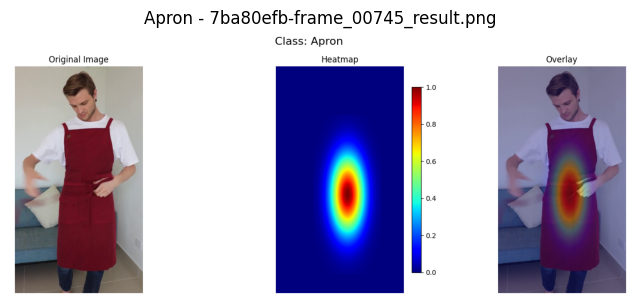

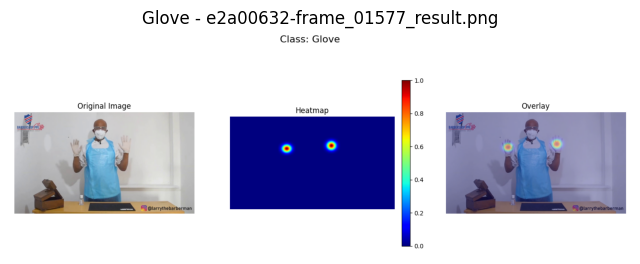

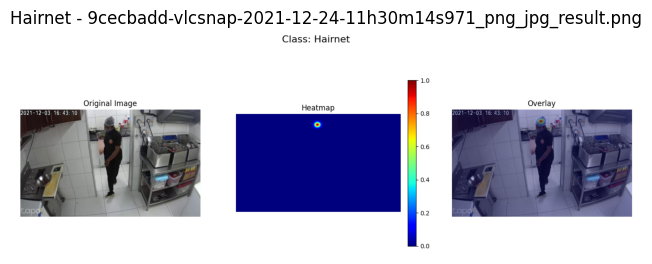

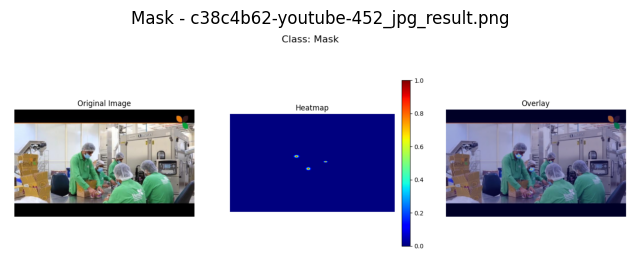

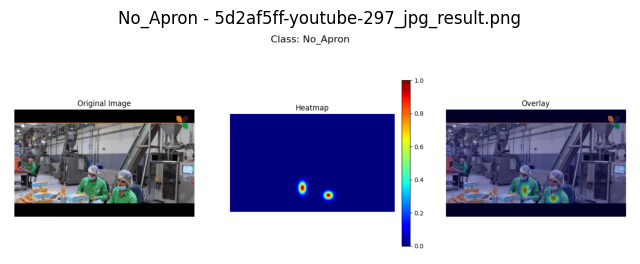

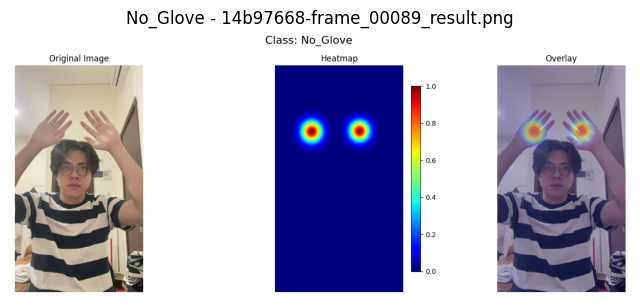

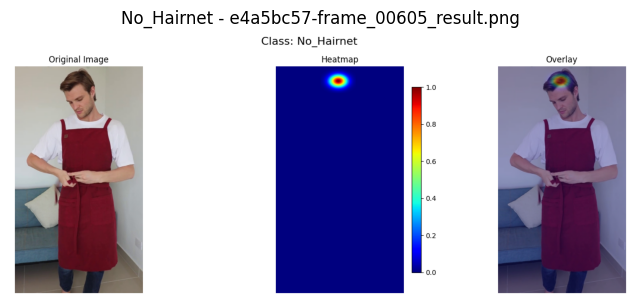

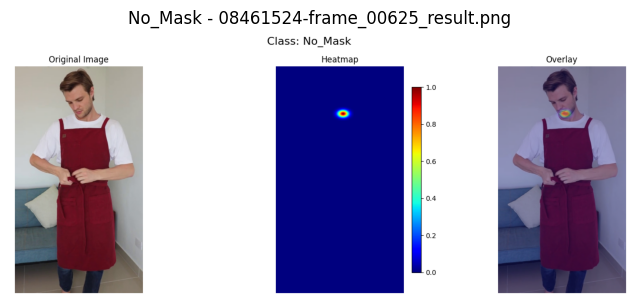

In [ ]:
# Direktori output heatmap
output_dir = "heatmap_results"

# Kelas dari tiap gambar
class_names = ['Apron', 'Glove', 'Hairnet', 'Mask', 'No_Apron', 'No_Glove', 'No_Hairnet', 'No_Mask']

# Fungsi untuk menampilkan satu gambar dari setiap kelas
def display_one_image_per_class():
    # Pilih satu gambar dari setiap kelas
    for class_name in class_names:
        class_output_dir = os.path.join(output_dir, class_name)
        
        # Ambil satu gambar acak dari setiap kelas
        images_in_class = os.listdir(class_output_dir)
        
        if images_in_class:
            selected_image = random.choice(images_in_class)  # Ambil gambar acak
            img_path = os.path.join(class_output_dir, selected_image)
            
            # Tampilkan gambar
            img = plt.imread(img_path)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.title(f'{class_name} - {selected_image}')
            plt.axis('off')
            plt.show()
        else:
            print(f"Tidak ada gambar untuk kelas {class_name}")

# Panggil fungsi untuk menampilkan gambar
display_one_image_per_class()


Berikut hasil anaisis terkait sampling dari 8 kelas beserta heatmap setiap anotasinya:

**1. Apron**

- **Distribusi Heatmap**: Titik pusat sebagian besar berada di sekitar bagian tengah tubuh, dengan intensitas lebih tinggi di area dada dan perut.
- **Observasi**: Memiliki distribusi yang cukup terpusat pada tubuh bagian atas.

**2. Glove**

- **Distribusi Heatmap**: Titik pusat lebih terfokus pada tangan, dengan intensitas lebih tinggi di sekitar tangan.
- **Observasi**: Distribusi lebih tersebar di area tangan dengan variasi sedikit lebih tinggi dibandingkan kelas lain.

**3. Hairnet**

- **Distribusi Heatmap**: Titik pusat terfokus di bagian atas kepala, dengan sedikit penyebaran di sekitar area kepala.
- **Observasi**: Heatmap terpusat pada kepala, khususnya bagian atas.

**4. Mask**

- **Distribusi Heatmap**: Titik pusat terfokus pada area wajah, terutama bagian mulut dan hidung.
- **Observasi**: Distribusi dominan di sekitar wajah, dengan fokus pada area yang menutupi hidung dan mulut.

**5. No_Apron**

- **Distribusi Heatmap**: Titik pusat lebih tersebar ke area tubuh bagian atas dengan beberapa variasi pada posisi.
- **Observasi**: Meskipun tidak ada apron, distribusi heatmap lebih luas dibandingkan dengan kelas "Apron".

**6. No_Glove**

- **Distribusi Heatmap**: Titik pusat berada di area tubuh, sering kali sekitar dada atau tangan.
- **Observasi**: Distribusi lebih tersebar, menunjukkan bahwa tanpa sarung tangan, titik pusat ada di bagian tubuh yang lebih besar.

**7. No_Hairnet**

- **Distribusi Heatmap**: Titik pusat terfokus di sekitar kepala, menunjukkan area yang kosong tanpa pelindung rambut.
- **Observasi**: Heatmap terpusat pada kepala, dengan distribusi yang lebih luas daripada kelas dengan "Hairnet".

**8. No_Mask**

- **Distribusi Heatmap**: Titik pusat terfokus pada wajah, terutama area mulut dan hidung tanpa masker.
- **Observasi**: Distribusi pusat wajah yang tidak tertutup masker terlihat jelas pada area mulut dan hidung.

**Kesimpulan:**

- **Kelas dengan fokus terpusat di kepala**: Hairnet, Mask, No_Hairnet, No_Mask.
- **Kelas dengan distribusi di area tangan**: Glove, No_Glove.
- **Kelas dengan distribusi tubuh bagian atas**: Apron, No_Apron.

## **E. Heatmap Bounding Box**

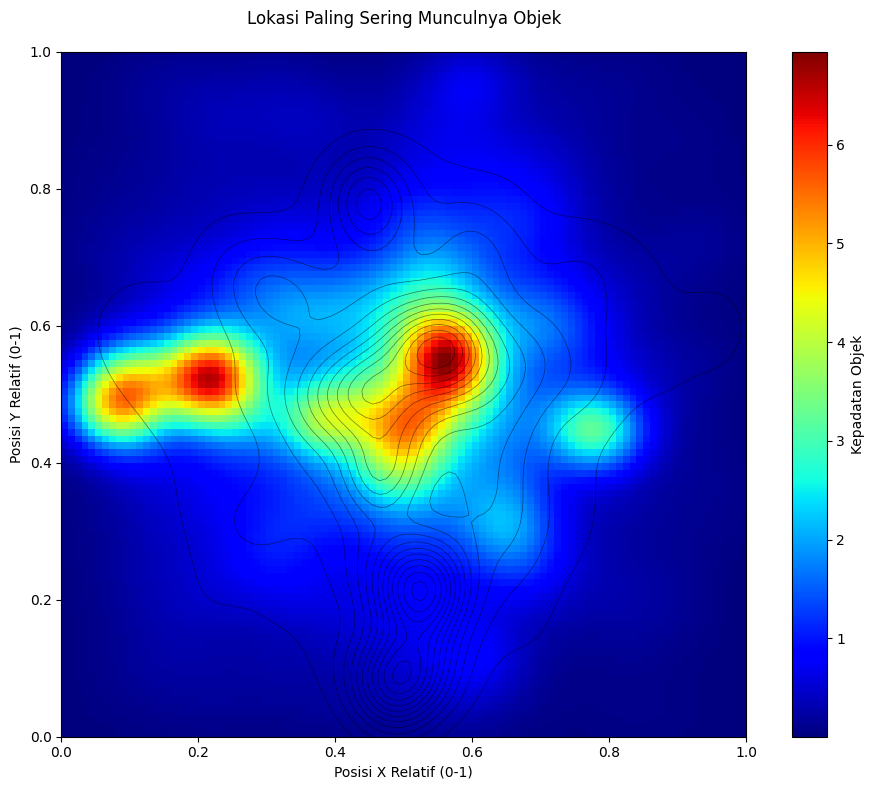

In [19]:
# Fungsi untuk membuat topographic heatmap
def plot_object_density_heatmap(labels_dir):
    # Kumpulkan semua titik tengah bounding box
    x_centers = []
    y_centers = []
    
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) >= 5:
                            _, x, y, _, _ = map(float, parts[:5])
                            x_centers.append(x)
                            y_centers.append(y)
    
    # Hitung density dengan KDE
    xy = np.vstack([x_centers, y_centers])
    kde = gaussian_kde(xy)
    
    # Buat grid
    xi, yi = np.mgrid[0:1:100j, 0:1:100j]
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot heatmap dengan palet warna "hot" atau "Reds"
    plt.figure(figsize=(10, 8))
    plt.imshow(zi.reshape(xi.shape), 
               origin='lower', 
               extent=[0, 1, 0, 1],
               cmap='jet')  # Ubah cmap menjadi 'hot' untuk gradasi merah
    
    plt.colorbar(label='Kepadatan Objek')
    plt.title('Lokasi Paling Sering Munculnya Objek', pad=20)
    plt.xlabel('Posisi X Relatif (0-1)')
    plt.ylabel('Posisi Y Relatif (0-1)')
    
    # Tambahkan contour lines untuk topografi
    levels = np.linspace(zi.min(), zi.max(), 15)
    plt.contour(xi, yi, zi.reshape(xi.shape), 
                levels=levels, 
                colors='black', 
                linewidths=0.5, 
                alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Jalankan fungsi
plot_object_density_heatmap(labels["Total"])


Berikut hasil anaisis terkait lokasi paling sering munculnya objek:

**1. Posisi Paling Sering Munculnya Objek**

Objek paling sering muncul di sekitar posisi X = 0.5 dan posisi Y = 0.6. Ini menunjukkan bahwa objek cenderung terkumpul di bagian tengah gambar, baik secara horizontal maupun vertikal.

**2. Kepadatan Objek**

Warna merah pada gambar menunjukkan kepadatan tinggi objek yang terdeteksi di posisi tertentu. Intensitas tertinggi pada posisi X = 0.5 dan Y = 0.6, yang mengindikasikan posisi utama bagi objek yang dianalisis. Warna putih menandakan kepadatan objek paling tinggi di sekitar posisi tersebut.

**3. Distribusi Objek**

Area yang lebih terang pada gambar menunjukkan lebih banyak objek yang terdeteksi. Objek lebih sering muncul di area tengah gambar, dengan konsentrasi lebih tinggi di sekitar posisi 0.5 di sumbu X dan 0.6 di sumbu Y. Terdapat sebaran yang lebih lebar pada posisi horizontal, sementara sebaran vertikal lebih terkonsentrasi.

**4. Konsistensi Posisi Objek**

Posisi objek cukup konsisten di bagian tengah gambar, dengan kepadatan objek yang sangat terlihat di sekitar posisi 0.5 X dan 0.6 Y. Area di luar posisi tersebut menunjukkan kepadatan rendah baik di bagian kiri, kanan, atas, maupun bawah gambar.

## **F. Heatmap Distribusi Letak Bounding Box Per Kelas** 

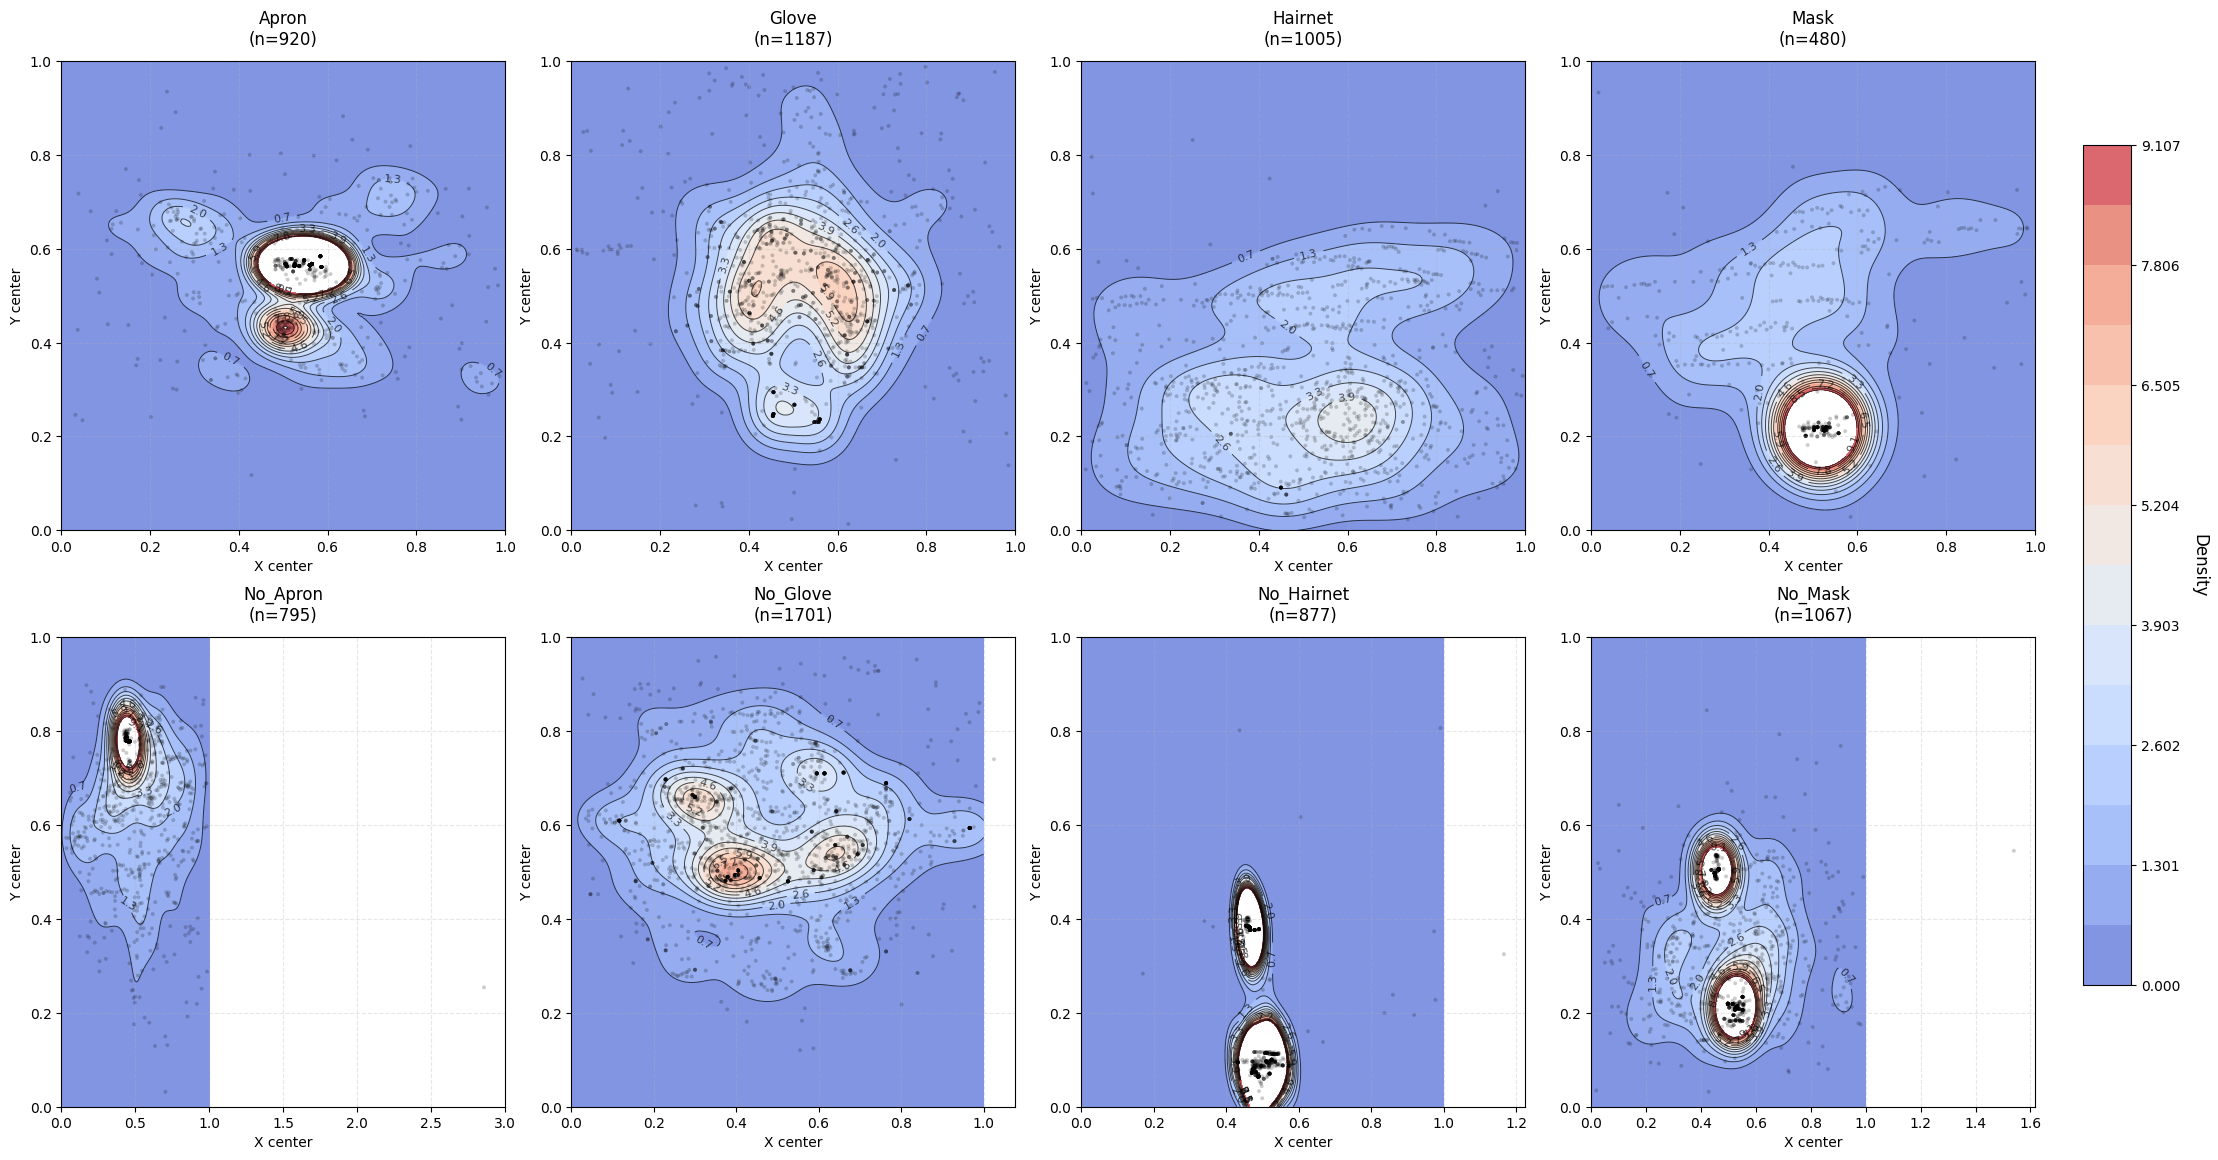

In [17]:
# ------------------ DATA COLLECTION ------------------
heatmap_per_class = defaultdict(lambda: {"x": [], "y": []})

for subset, label_dir in labels.items():
    for fname in os.listdir(label_dir):
        if not fname.endswith(".txt"):
            continue
        with open(os.path.join(label_dir, fname)) as f:
            for line in f:
                if not line.strip():
                    continue
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x, y, _, _ = map(float, parts[:5])
                    label = class_names[int(class_id)]
                    heatmap_per_class[label]["x"].append(x)
                    heatmap_per_class[label]["y"].append(y)

# ------------------ OPTIMIZED VISUALIZATION ------------------
plt.style.use('default')  # Using default style for better control

# Create figure with larger size
cols = 4
rows = (len(class_names) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(24, 6 * rows))
axes = axes.flatten()

# Create more intense blue-red colormap
cmap = plt.get_cmap('coolwarm')
colors_array = cmap(np.linspace(0, 1, 256))
# Enhance color saturation
colors_array = colors_array**0.6  # Lower exponent = more saturated
intense_cmap = colors.ListedColormap(colors_array)  # Perbaikan di sini

# Calculate global max density
max_density = 0
for label in class_names:
    if len(heatmap_per_class[label]["x"]) > 1:
        xy = np.vstack([heatmap_per_class[label]["x"], 
                      heatmap_per_class[label]["y"]])
        kde = gaussian_kde(xy)
        max_density = max(max_density, kde([0.5, 0.5])[0])

for i, label in enumerate(class_names):
    ax = axes[i]
    xs = heatmap_per_class[label]["x"]
    ys = heatmap_per_class[label]["y"]
    
    if len(xs) > 1:
        xy = np.vstack([xs, ys])
        kde = gaussian_kde(xy)
        
        grid_size = 200j
        xi, yi = np.mgrid[0:1:grid_size, 0:1:grid_size]
        zi = kde(np.vstack([xi.flatten(), yi.flatten()])).reshape(xi.shape)
        
        levels = np.linspace(0, max_density*0.8, 15)
        
        # Plot heatmap with intense colors
        im = ax.contourf(xi, yi, zi, 
                        levels=levels,
                        cmap=intense_cmap,
                        alpha=0.9,
                        vmin=0,
                        vmax=max_density*0.8 if max_density > 0 else 1)
        
        # Enhanced topography lines
        contour = ax.contour(xi, yi, zi, 
                           levels=levels,
                           colors='black',
                           linewidths=0.7,
                           alpha=0.7)
        
        # Add contour labels
        ax.clabel(contour, inline=True, fontsize=8, fmt='%1.1f')
        
        # Scatter plot
        ax.scatter(xs, ys, s=8, c='black', alpha=0.2, edgecolors='none')
        
        ax.set_title(f"{label}\n(n={len(xs)})", fontsize=12, pad=12)
        ax.set_xlabel("X center", fontsize=10)
        ax.set_ylabel("Y center", fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)
        
    elif len(xs) == 1:
        ax.scatter(xs[0], ys[0], s=100, c='red', edgecolor='black')
        ax.set_title(f"{label}\n(n=1)", fontsize=12)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.grid(True, linestyle='--', alpha=0.3)
    else:
        ax.set_title(f"{label}\n(no data)", fontsize=12)
        ax.axis('off')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and move main title upwards
plt.tight_layout()
plt.subplots_adjust(top=0.92, right=0.85)  # Adjusted for title space

# Add colorbar
if max_density > 0:
    cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('Density', rotation=270, labelpad=20, fontsize=12)
    cbar.ax.tick_params(labelsize=10)

plt.show()


Berikut hasil anaisis terkait distribusi titik tengah bounding box:

**1. Posisi Paling Sering Munculnya Objek**

- **Apron**: Titik pusat objek paling sering muncul di sekitar posisi X = 0.5 dan Y = 0.6.
- **Glove**: Titik pusat objek lebih terfokus di sekitar tangan, di posisi X = 0.3 dan Y = 0.6.
- **Hairnet**: Titik pusat berada di bagian atas kepala, dengan konsentrasi di sekitar X = 0.5 dan Y = 0.2.
- **Mask**: Titik pusat paling sering di area wajah, dengan konsentrasi utama pada X = 0.6 dan Y = 0.2.

**2. Kepadatan Objek**

- Posisi dengan kepadatan objek paling tinggi ditemukan di sekitar X = 0.5 dan Y = 0.6 untuk beberapa kelas seperti **Apron** dan **Glove**.
- Warna merah pada heatmap menunjukkan area dengan kepadatan objek yang lebih tinggi, terutama pada bagian tengah tubuh dan wajah.

**3. Distribusi Objek**

- Pada **No_Apron** dan **No_Glove**, distribusi titik pusat lebih tersebar pada area tubuh bagian atas dan tangan.
- **Hairnet** dan **Mask** menunjukkan konsentrasi titik pusat di kepala dan wajah dengan lebih sedikit penyebaran horizontal.
**4. Konsistensi Posisi Objek**

- Posisi objek pada **Apron**, **Glove**, dan **Mask** menunjukkan konsistensi yang lebih besar di area tengah tubuh dan wajah, masing-masing.
- **No_Apron** dan **No_Glove** menunjukkan variasi lebih besar, dengan titik pusat objek tersebar lebih luas.

**5. Variasi Distribusi**

- **No_Apron** memiliki distribusi titik tengah objek yang lebih lebar. Hal ini menunjukkan ketidakhadiran apron lebih banyak pada tubuh bagian atas.
- **Hairnet** dan **No_Hairnet** memiliki konsentrasi objek lebih tinggi pada bagian kepala. Hal ini menunjukkan perbedaan dengan dan tanpa pelindung rambut.

**6. Konsentrasi Titik Tengah**

- **Mask** memiliki konsentrasi titik tengah objek yang sangat tinggi di area wajah, khususnya pada bagian mulut dan hidung. Hal ini menunjukkan distribusi masker yang terfokus di area tersebut.

**7. Area Tanpa Objek**

- **No_Apron** dan **No_Mask** memiliki area besar tanpa objek terutama di bagian kiri atau luar gambar. Hal ini menandakan lebih sedikit objek di bagian tersebut.

**8. Hubungan Titik Tengah dan Pakaian**

- **Apron** dan **No_Apron** menunjukkan konsentrasi objek yang lebih banyak di tubuh bagian atas, terutama di sekitar dada dan perut.
- **Glove** dan **No_Glove** menunjukkan bahwa tangan lebih sering terlihat pada titik pusat dibandingkan dengan bagian tubuh lainnya.
